In [2]:
import os
import re

import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.datasets import fetch_20newsgroups, load_files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, log_loss, roc_auc_score,
                             roc_curve)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [3]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

PATH_TO_WRITE_DATA = "../../../data/tmp/"
data_demo = pd.read_csv(os.path.join(DATA_PATH, "weights_heights.csv"))

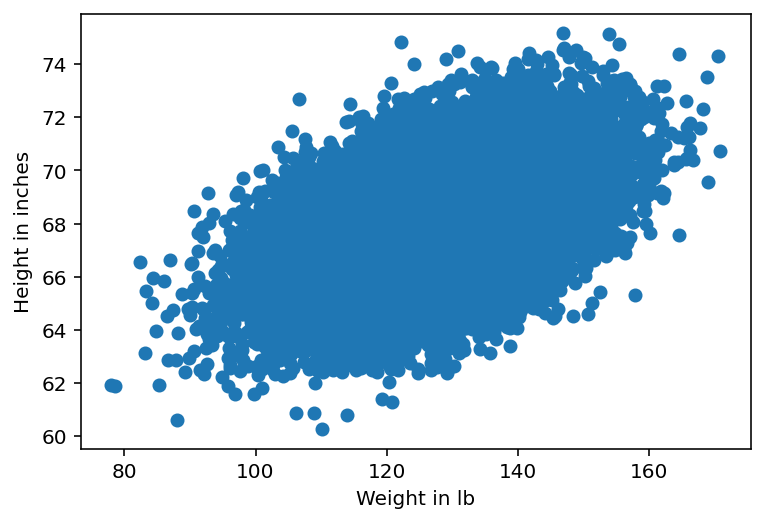

In [4]:
plt.scatter(data_demo["Weight"], data_demo["Height"])
plt.xlabel("Weight in lb")
plt.ylabel("Height in inches");

In [5]:
#Label Encoding

In [6]:
df = pd.read_csv(os.path.join(DATA_PATH, "bank_train.csv"))
labels = pd.read_csv(
    os.path.join(DATA_PATH, "bank_train_target.csv"), header=None
)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,student,single,high.school,no,no,no,telephone,jun,mon,901,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
1,46,admin.,married,university.degree,no,yes,no,cellular,aug,tue,208,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2,49,blue-collar,married,basic.4y,unknown,yes,yes,telephone,jun,tue,131,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,31,technician,married,university.degree,no,no,no,cellular,jul,tue,404,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2
4,42,housemaid,married,university.degree,no,yes,no,telephone,nov,mon,85,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


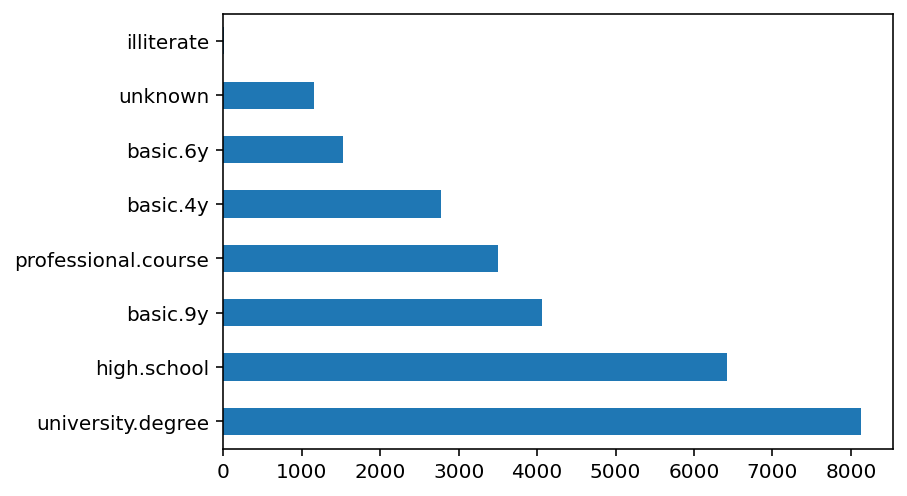

In [7]:
df["education"].value_counts().plot.barh();

In [8]:
label_encoder = LabelEncoder()

{0: 'basic.4y', 1: 'basic.6y', 2: 'basic.9y', 3: 'high.school', 4: 'illiterate', 5: 'professional.course', 6: 'university.degree', 7: 'unknown'}


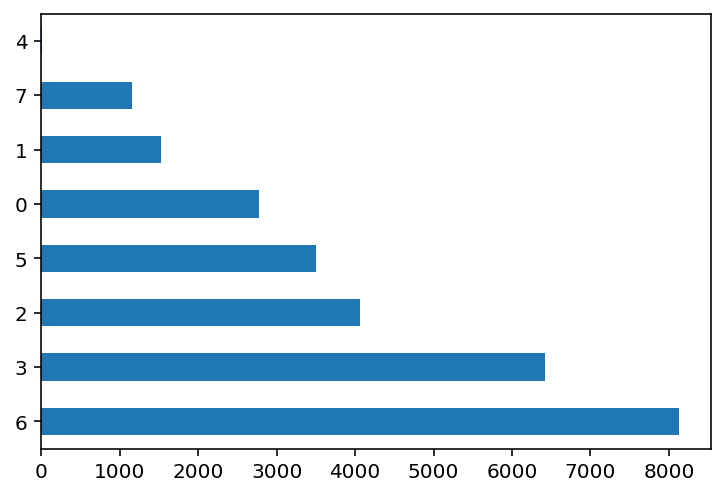

In [9]:
mapped_education = pd.Series(label_encoder.fit_transform(df["education"]))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [10]:
df["education"] = mapped_education
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,student,single,3,no,no,no,telephone,jun,mon,901,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
1,46,admin.,married,6,no,yes,no,cellular,aug,tue,208,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2,49,blue-collar,married,0,unknown,yes,yes,telephone,jun,tue,131,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,31,technician,married,6,no,no,no,cellular,jul,tue,404,1,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2
4,42,housemaid,married,6,no,yes,no,telephone,nov,mon,85,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [11]:
categorical_columns = df.columns[df.dtypes == "object"].union(["education"])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,8,2,3,0,0,0,1,4,1,901,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
1,46,0,1,6,0,2,0,0,1,3,208,2,999,0,1,1.4,93.444,-36.1,4.963,5228.1
2,49,1,1,0,1,2,2,1,4,3,131,5,999,0,1,1.4,94.465,-41.8,4.864,5228.1
3,31,9,1,6,0,0,0,0,3,3,404,1,999,0,1,-2.9,92.469,-33.6,1.044,5076.2
4,42,3,1,6,0,2,0,1,7,1,85,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8


In [12]:
df.loc[0].job - df.loc[2].job

7.0

In [13]:
#We can see that logistic regression never predicts class 1. In order to use linear models with categorical features, we will use a different approach: One-Hot Encoding.

def logistic_regression_accuracy_on(dataframe, labels):
    features = dataframe
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels
    )

    logit = LogisticRegression()
    logit.fit(train_features, train_labels)
    return classification_report(test_labels, logit.predict(test_features))


print(logistic_regression_accuracy_on(df[categorical_columns], labels))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6103
           1       0.50      0.00      0.00       796

    accuracy                           0.88      6899
   macro avg       0.69      0.50      0.47      6899
weighted avg       0.84      0.88      0.83      6899



c:\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#One-Hot Encoding
one_hot_example = pd.DataFrame([{i: 0 for i in range(10)}])
one_hot_example.loc[0, 6] = 1
one_hot_example

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,1,0,0,0


In [15]:
onehot_encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_columns = pd.DataFrame(
    onehot_encoder.fit_transform(df[categorical_columns])
)
encoded_categorical_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
encoded_categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27595 entries, 0 to 27594
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       27595 non-null  float64
 1   1       27595 non-null  float64
 2   2       27595 non-null  float64
 3   3       27595 non-null  float64
 4   4       27595 non-null  float64
 5   5       27595 non-null  float64
 6   6       27595 non-null  float64
 7   7       27595 non-null  float64
 8   8       27595 non-null  float64
 9   9       27595 non-null  float64
 10  10      27595 non-null  float64
 11  11      27595 non-null  float64
 12  12      27595 non-null  float64
 13  13      27595 non-null  float64
 14  14      27595 non-null  float64
 15  15      27595 non-null  float64
 16  16      27595 non-null  float64
 17  17      27595 non-null  float64
 18  18      27595 non-null  float64
 19  19      27595 non-null  float64
 20  20      27595 non-null  float64
 21  21      27595 non-null  float64
 22

In [17]:
print(logistic_regression_accuracy_on(encoded_categorical_columns, labels))

c:\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6102
           1       0.68      0.18      0.29       797

    accuracy                           0.90      6899
   macro avg       0.79      0.59      0.62      6899
weighted avg       0.88      0.90      0.87      6899



c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#Hashing trick. Hash functions can help us find unique codes for different feature values, for example:

for s in ("university.degree", "high.school", "illiterate"):
    print(s, "->", hash(s))

university.degree -> -7223336579694347184
high.school -> 6456967139039408546
illiterate -> 7076054397976021656


In [19]:
hash_space = 25
for s in ("university.degree", "high.school", "illiterate"):
    print(s, "->", hash(s) % hash_space)

university.degree -> 16
high.school -> 21
illiterate -> 6


In [20]:
hashing_example = pd.DataFrame([{i: 0.0 for i in range(hash_space)}])
for s in ("job=student", "marital=single", "day_of_week=mon"):
    print(s, "->", hash(s) % hash_space)
    hashing_example.loc[0, hash(s) % hash_space] = 1
hashing_example

job=student -> 13
marital=single -> 22
day_of_week=mon -> 8


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
#We want to point out that we hash not only feature values but also pairs of feature name + feature value. 
#It is important to do this so that we can distinguish the same values of different features.

assert hash("no") == hash("no")
assert hash("housing=no") != hash("loan=no")

In [22]:
#From https://vowpalwabbit.org/docs/vowpal_wabbit/python/latest/tutorials/python_first_steps.html
import vowpalwabbit
model = vowpalwabbit.Workspace(quiet=True)

train_examples = [
    "0 | price:.23 sqft:.25 age:.05 2006",
    "1 | price:.18 sqft:.15 age:.35 1976",
    "0 | price:.53 sqft:.32 age:.87 1924",
]

for example in train_examples:
    model.learn(example)

test_example = "| price:.46 sqft:.4 age:.10 1924"

prediction = model.predict(test_example)
print(prediction)

0.0


In [23]:
!vw --help

"vw" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [24]:
#News. Binary classification.
# load data with sklearn's function
newsgroups = fetch_20newsgroups(data_home=PATH_TO_WRITE_DATA)

In [32]:
newsgroups["target_names"]

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [33]:
text = newsgroups["data"][0]
target = newsgroups["target_names"][newsgroups["target"][0]]

print("-----")
print(target)
print("-----")
print(text.strip())
print("----")

-----
rec.autos
-----
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----
----


In [34]:
#convert the data into something Vowpal Wabbit can understand. We will throw away words shorter than 3 symbols. Here, we will skip some important NLP stages such as stemming and lemmatization; however,
#we will later see that VW solves the problem even without these steps.

def to_vw_format(document, label=None):
    return (
        str(label or "")
        + " |text "
        + " ".join(re.findall("\w{3,}", document.lower()))
        + "\n"
    )


to_vw_format(text, 1 if target == "rec.autos" else -1)

'1 |text from lerxst wam umd edu where thing subject what car this nntp posting host rac3 wam umd edu organization university maryland college park lines was wondering anyone out there could enlighten this car saw the other day was door sports car looked from the late 60s early 70s was called bricklin the doors were really small addition the front bumper was separate from the rest the body this all know anyone can tellme model name engine specs years production where this car made history whatever info you have this funky looking car please mail thanks brought you your neighborhood lerxst\n'

In [35]:
all_documents = newsgroups["data"]
all_targets = [
    1 if newsgroups["target_names"][target] == "rec.autos" else -1
    for target in newsgroups["target"]
]

In [36]:
train_documents, test_documents, train_labels, test_labels = train_test_split(
    all_documents, all_targets, random_state=7
)

with open(os.path.join(PATH_TO_WRITE_DATA, "20news_train.vw"), "w") as vw_train_data:
    for text, target in zip(train_documents, train_labels):
        vw_train_data.write(to_vw_format(text, target))
with open(os.path.join(PATH_TO_WRITE_DATA, "20news_test.vw"), "w") as vw_test_data:
    for text in test_documents:
        vw_test_data.write(to_vw_format(text))

UnicodeEncodeError: 'charmap' codec can't encode character '\xe4' in position 42: character maps to <undefined>

In [37]:
!vw -d $PATH_TO_WRITE_DATA/20news_train.vw \
 --loss_function hinge -f $PATH_TO_WRITE_DATA/20news_model.vw

"vw" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
